In [1]:
%matplotlib notebook 
#%matplotlib qt
from data_wrapper import RawData
from process import Process
from classify import *
from analyse import DataAnalysis, Analysis
import util
import pandas as pd
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

In [6]:
classifier_og = [BasicClassifier(), L2Classifier(), EntropyClassifier(), MarginClassifier(), GeoClassifier()]
cut_classifier = [BasicClassifier(), L2Classifier(aggregate_interval=(0,4)), EntropyClassifier(aggregate_interval=(0,4)),
                MarginClassifier(aggregate_interval=(0,4)), GeoClassifier(aggregate_interval=(0,4))]
all_ncut_classifier = classifier_og + [ConfSAvrClassifier()]
multi_classifier = [MultiClassifier(classifier_og), HolmMultiClassifier(classifier_og),
                    MultiClassifier(classifier_og[:-1]+[ConfSAvrClassifier()]), 
                    HolmMultiClassifier(classifier_og[:-1]+[ConfSAvrClassifier()]),
                    MultiClassifier(classifier_og[:-1]), HolmMultiClassifier(classifier_og[:-1])]
all_single = all_ncut_classifier + cut_classifier
all_clf = all_single + multi_classifier
cut_comp = zip(classifier_og, cut_classifier)

In [8]:
res_cal = RawData("Res_ILSVRC_cal_data.csv", "Res_ILSCRC_cal")
res_test = [RawData("ResNet50_AwA_data.csv", "Res_AwA_cal")]

calibration_data = RawData("Squeeze_ILSVRC_cal_data.csv", "Squeeze_ILSVRC_cal")
test_data1 = RawData("Squeeze_ILSVRC_cal_data+dead_percent0.1.csv", "Squeeze_ILSVRC_dead0.1")
test_data2 = RawData("Squeeze_ILSVRC_cal_data+dead_percent0.2.csv", "Squeeze_ILSVRC_dead0.2")
test_data3 = RawData("Squeeze_ILSVRC_cal_data+dead_percent0.3.csv", "Squeeze_ILSVRC_dead0.3")
test_data = [test_data1,test_data2, test_data3]

In [19]:
multi_p = [[Process(calibration_data, j, i) for i in multi_classifier+ [EntropyClassifier()]] for j in test_data ]
multi_ana = [Analysis(p) for p in multi_p]

In [20]:
multi_ana[0].compose_report()


,bs,alpha,basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-holm_ksconf_l2_entropy_margin_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-holm_ksconf_l2_entropy_margin_0_1_confsavr-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-holm_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-multi_ksconf_l2_entropy_margin_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-multi_ksconf_l2_entropy_margin_0_1_confsavr-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-multi_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1
0,10.0,0.01,0.7054,0.5356,0.5136,0.5036,0.5377,0.5091,0.5174
1,30.0,0.01,0.9983,0.9952,0.9919,0.9929,0.9942,0.9937,0.9936
2,50.0,0.01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,100.0,0.01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,300.0,0.01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,500.0,0.01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<IPython.core.display.Javascript object>


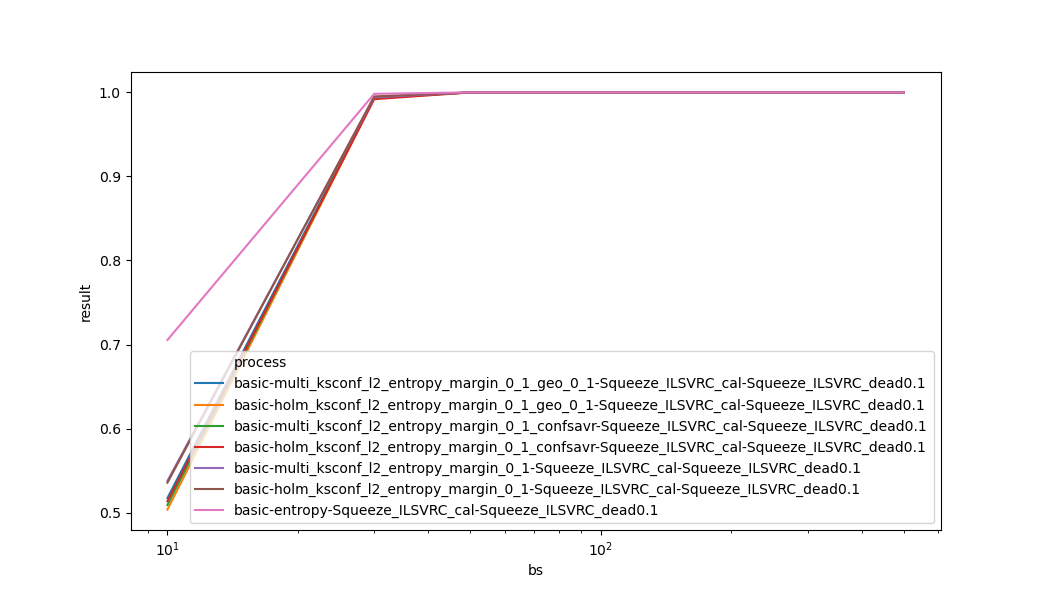

In [23]:
multi_ana[0].plot_roc("alpha", 0.01)

In [4]:
res_p = [Process(res_cal, j, i) for j in res_test for i in classifier_og]
res_ana = Analysis(res_p)

In [5]:
res_df = res_ana.compose_report()
res_df[(res_df["alpha"]==0.01)]

,bs,alpha,basic-entropy-Res_ILSCRC_cal-Res_AwA_cal,basic-geo_0_1-Res_ILSCRC_cal-Res_AwA_cal,basic-ksconf-Res_ILSCRC_cal-Res_AwA_cal,basic-l2-Res_ILSCRC_cal-Res_AwA_cal,basic-margin_0_1-Res_ILSCRC_cal-Res_AwA_cal
6,1.0,0.01,0.0034,0.0051,0.0032,0.0040,0.0051
16,3.0,0.01,0.0058,0.0119,0.0068,0.0069,0.0072
26,5.0,0.01,0.0059,0.0126,0.0083,0.0078,0.0095
36,10.0,0.01,0.0102,0.0192,0.0108,0.0119,0.0128
46,30.0,0.01,0.0235,0.0493,0.0245,0.0274,0.0284
56,50.0,0.01,0.0351,0.0915,0.0379,0.0411,0.0474
66,100.0,0.01,0.0919,0.2010,0.1050,0.1051,0.1148
76,300.0,0.01,0.4487,0.6823,0.4740,0.4722,0.4791
86,500.0,0.01,0.7714,0.9170,0.7893,0.7779,0.7829
96,1000.0,0.01,0.9945,0.9988,0.9916,0.9921,0.9906


<IPython.core.display.Javascript object>


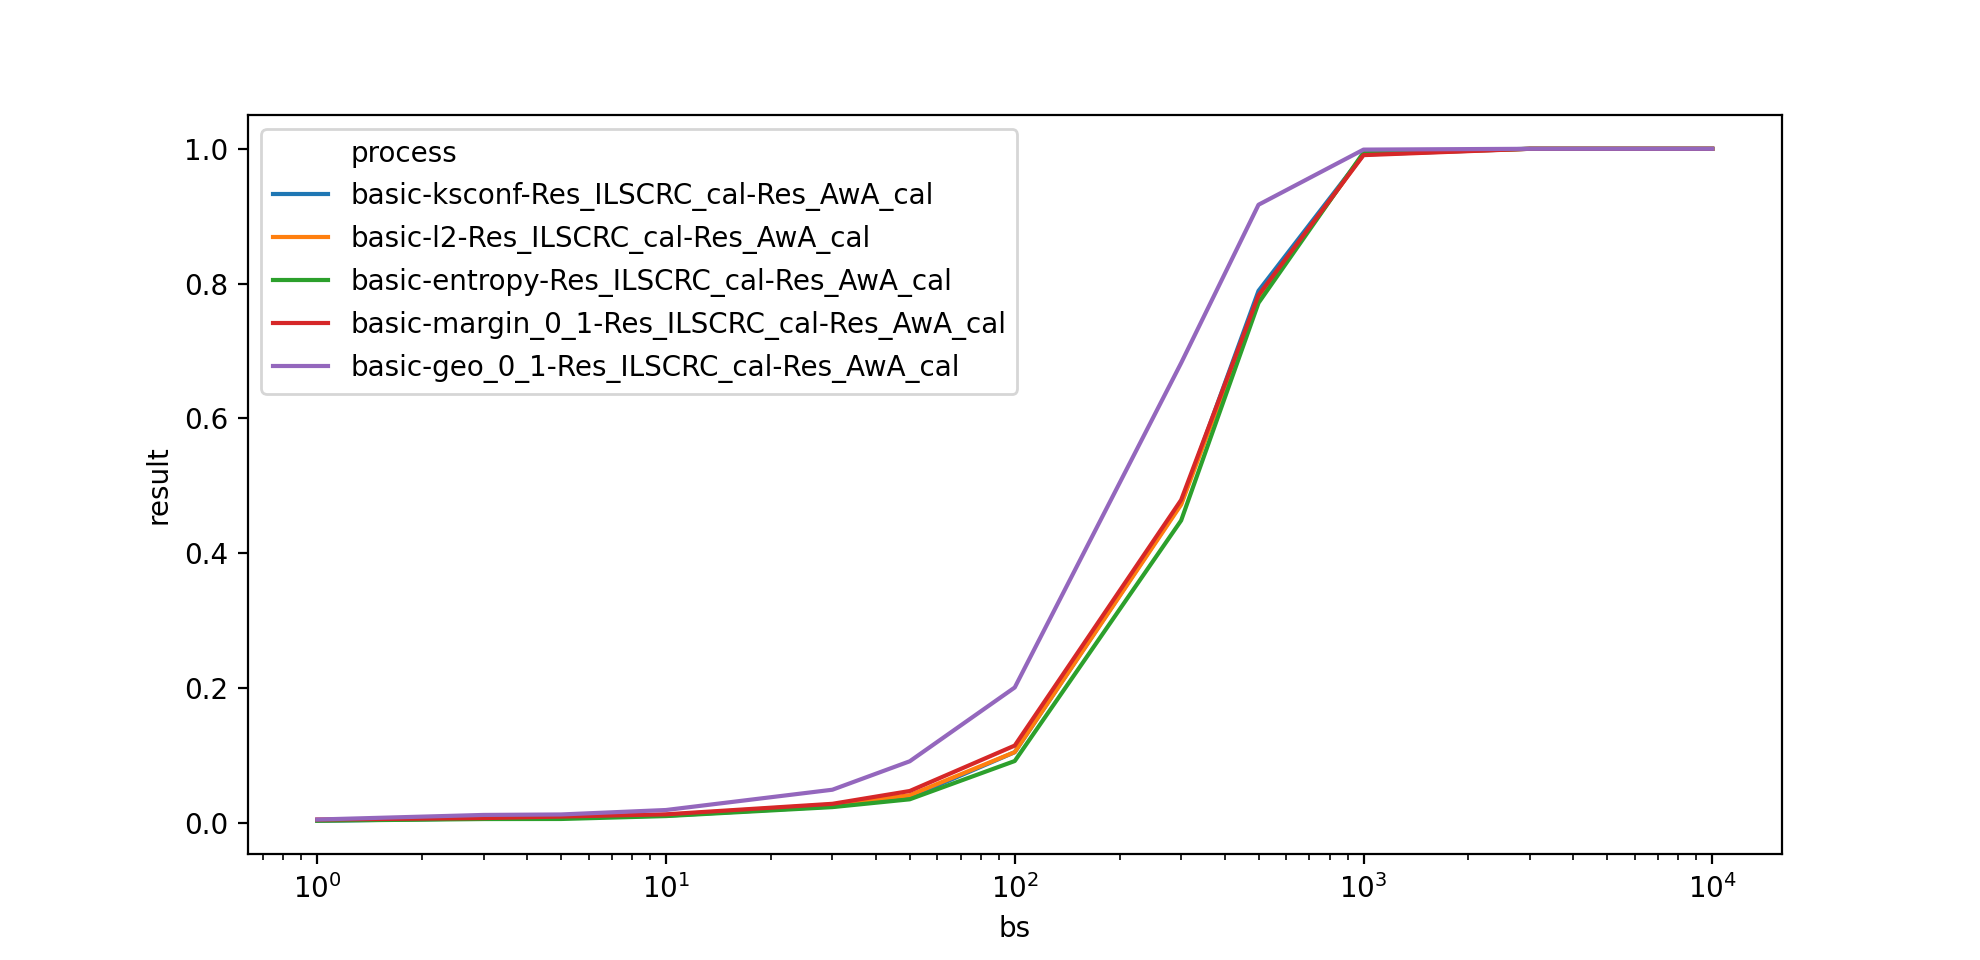

In [91]:
res_ana.plot_roc("alpha", 0.01)

In [118]:



p = [Process(calibration_data, j, i) for j in test_data for i in all_ncut_classifier]
ana = Analysis(p)

p_all = [Process(calibration_data, j, i) for j in test_data for i in all_clf]
ana_all = Analysis(p_all)

p_per_set = [[Process(calibration_data, j, i)  for i in all_clf] for j in test_data]
ana_per_set = [Analysis(i) for i in p_per_set]


p_cut_comp = [[Process(calibration_data, j, k)  for k in i for j in test_data] for i in cut_comp ]
ana_cut_comp = [Analysis(i) for i in p_cut_comp]

# ana.draw_hist()


In [119]:
all_df = ana_all.compose_report()
all_df[(df["bs"]>= 10) & (df["bs"]<=500)]

,bs,alpha,basic-confsavr-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-confsavr-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-confsavr-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-entropy_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-entropy_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-entropy_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-geo_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-geo_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-geo_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-holm_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-holm_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-holm_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-ksconf-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-ksconf-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-ksconf-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-l2-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-l2-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-l2-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-l2_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-l2_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-l2_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-margin_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-margin_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-margin_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-margin_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-margin_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-margin_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3,basic-multi_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1,basic-multi_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-multi_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3
3,10.0,0.01,0.4512,0.5312,0.1295,0.7054,0.805,0.4746,0.3825,0.4980,0.1616,0.0219,0.0041,0.0956,0.1529,0.5054,0.3352,0.5036,0.6079,0.2108,0.4745,0.569,0.1486,0.5600,0.6579,0.2316,0.5745,0.6586,0.2347,0.3040,0.3704,0.0796,0.4816,0.5708,0.1643,0.5174,0.5952,0.2095
4,30.0,0.01,0.9687,0.9963,0.9091,0.9983,1.000,0.9982,0.9462,0.9946,0.9111,0.1489,0.0654,0.8527,0.9065,0.9987,0.9930,0.9929,0.9999,0.9856,0.9773,0.997,0.9439,0.9887,0.9990,0.9635,0.9888,0.9992,0.9658,0.9125,0.9863,0.8574,0.9786,0.9980,0.9508,0.9936,0.9995,0.9884
5,50.0,0.01,0.9993,1.0000,0.9997,1.0000,1.000,1.0000,0.9981,1.0000,0.9990,0.3468,0.3406,0.9971,0.9978,1.0000,1.0000,1.0000,1.0000,1.0000,0.9995,1.000,0.9999,0.9999,1.0000,0.9997,1.0000,1.0000,1.0000,0.9967,1.0000,0.9991,0.9996,1.0000,0.9999,1.0000,1.0000,1.0000
6,100.0,0.01,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.8011,0.9880,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,300.0,0.01,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,500.0,0.01,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<IPython.core.display.Javascript object>


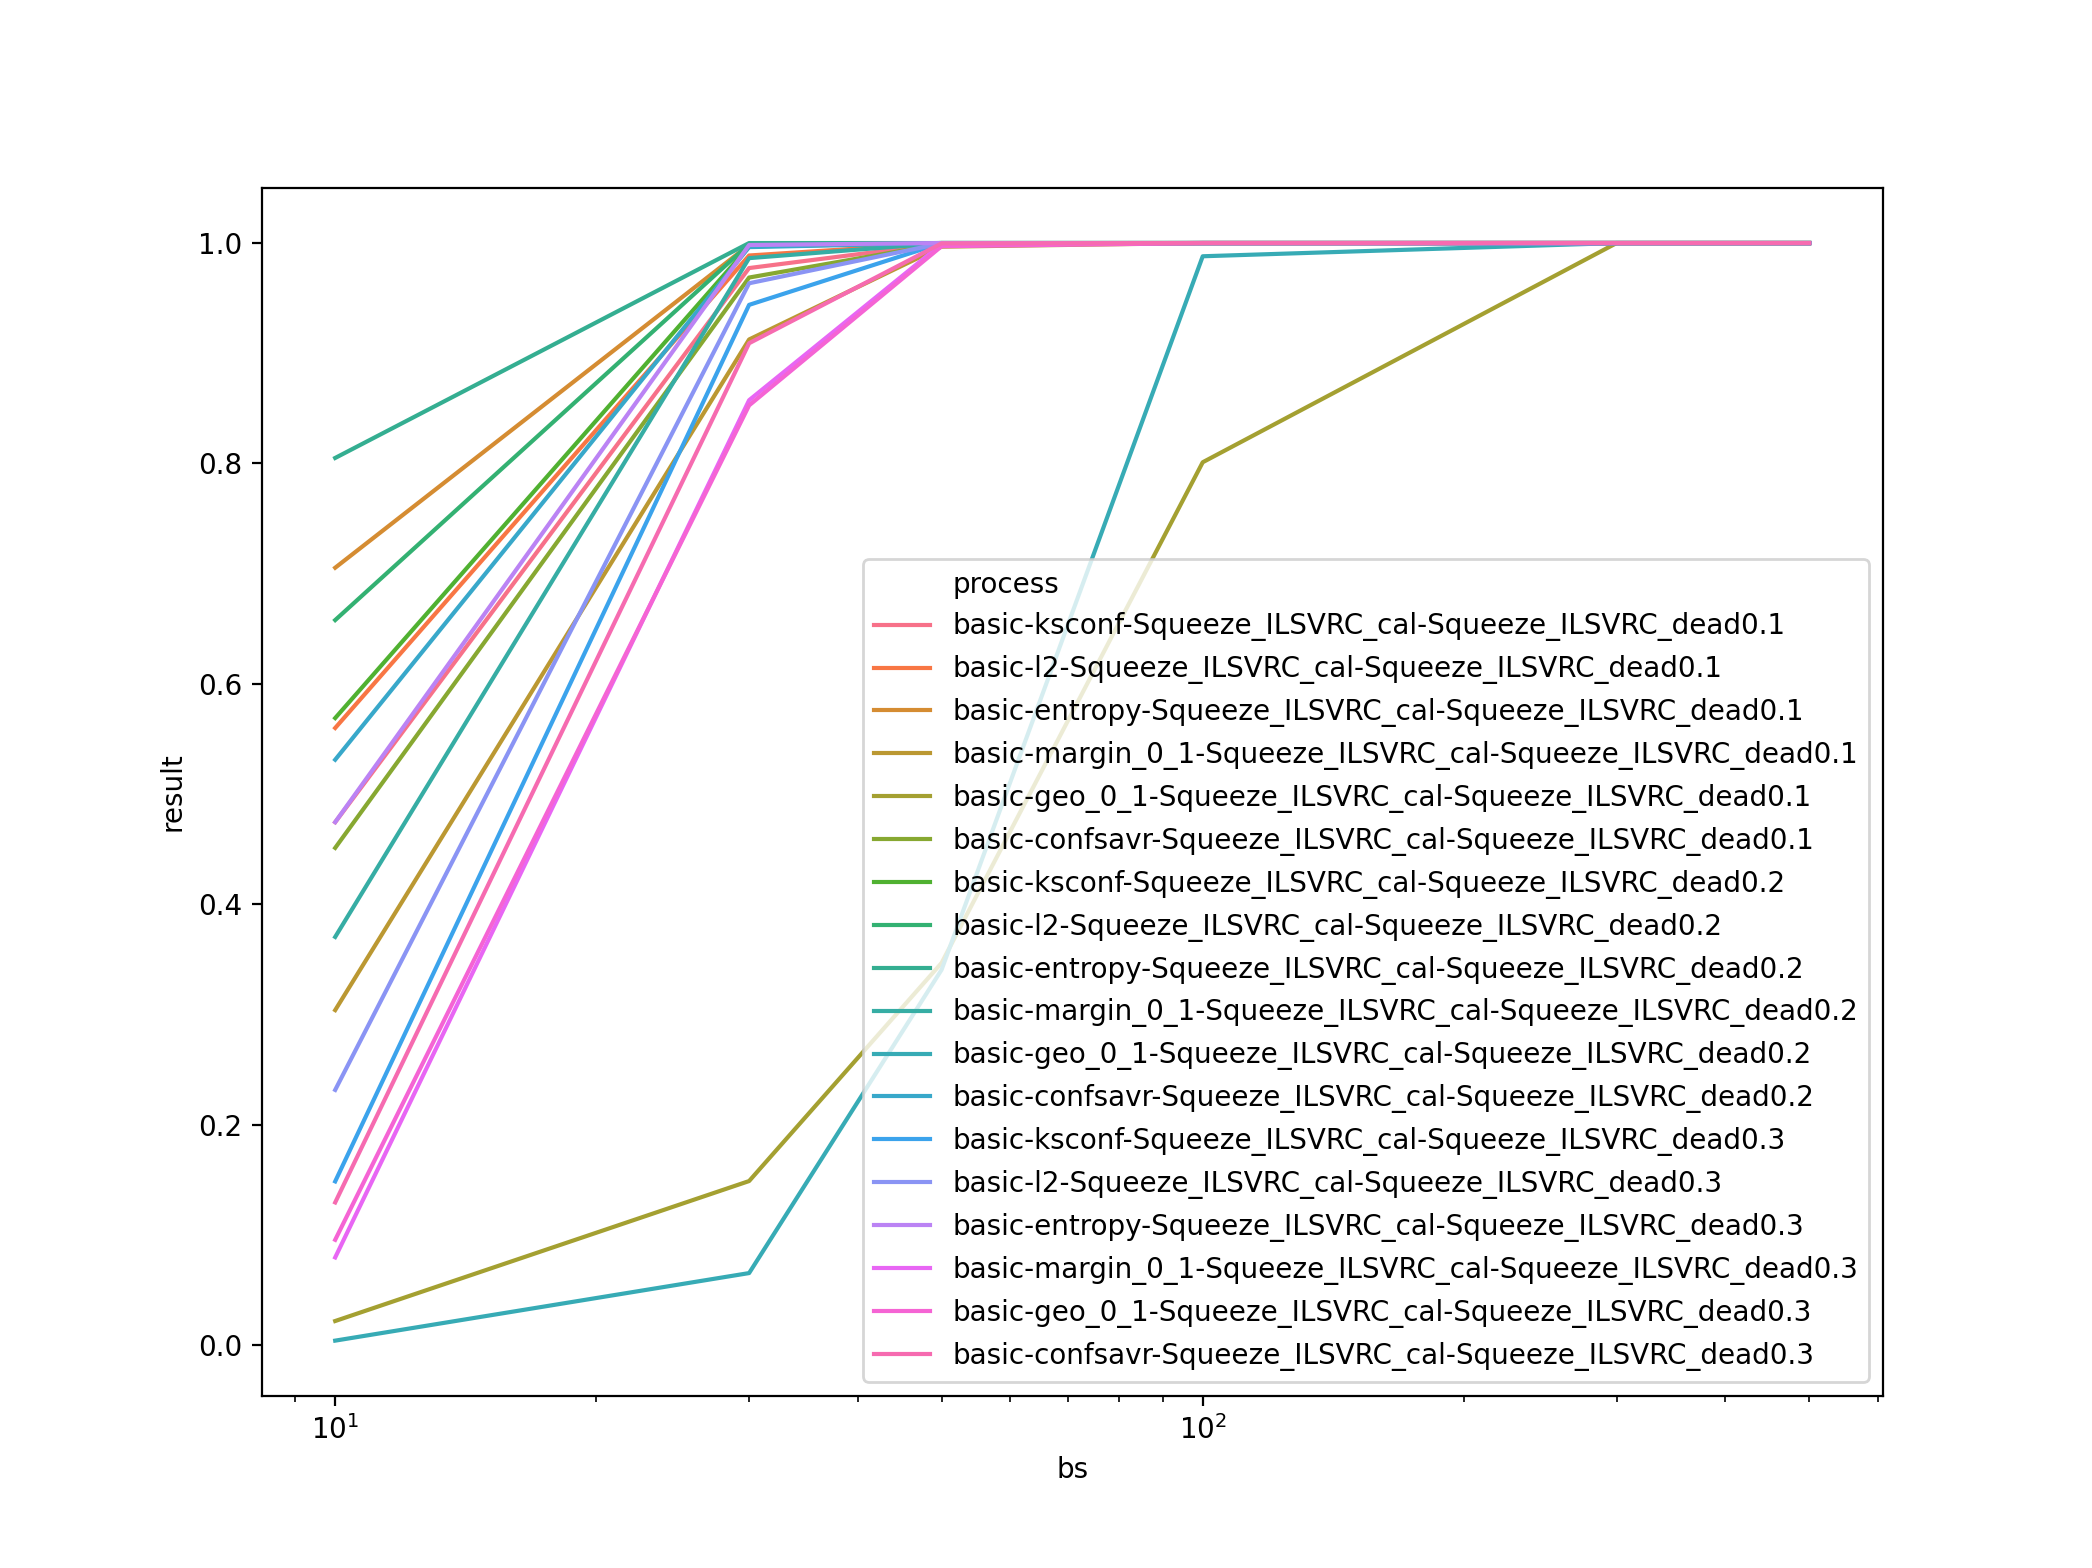

In [20]:
ana.plot_roc("alpha", 0.01, from_to=(10,500))

<IPython.core.display.Javascript object>


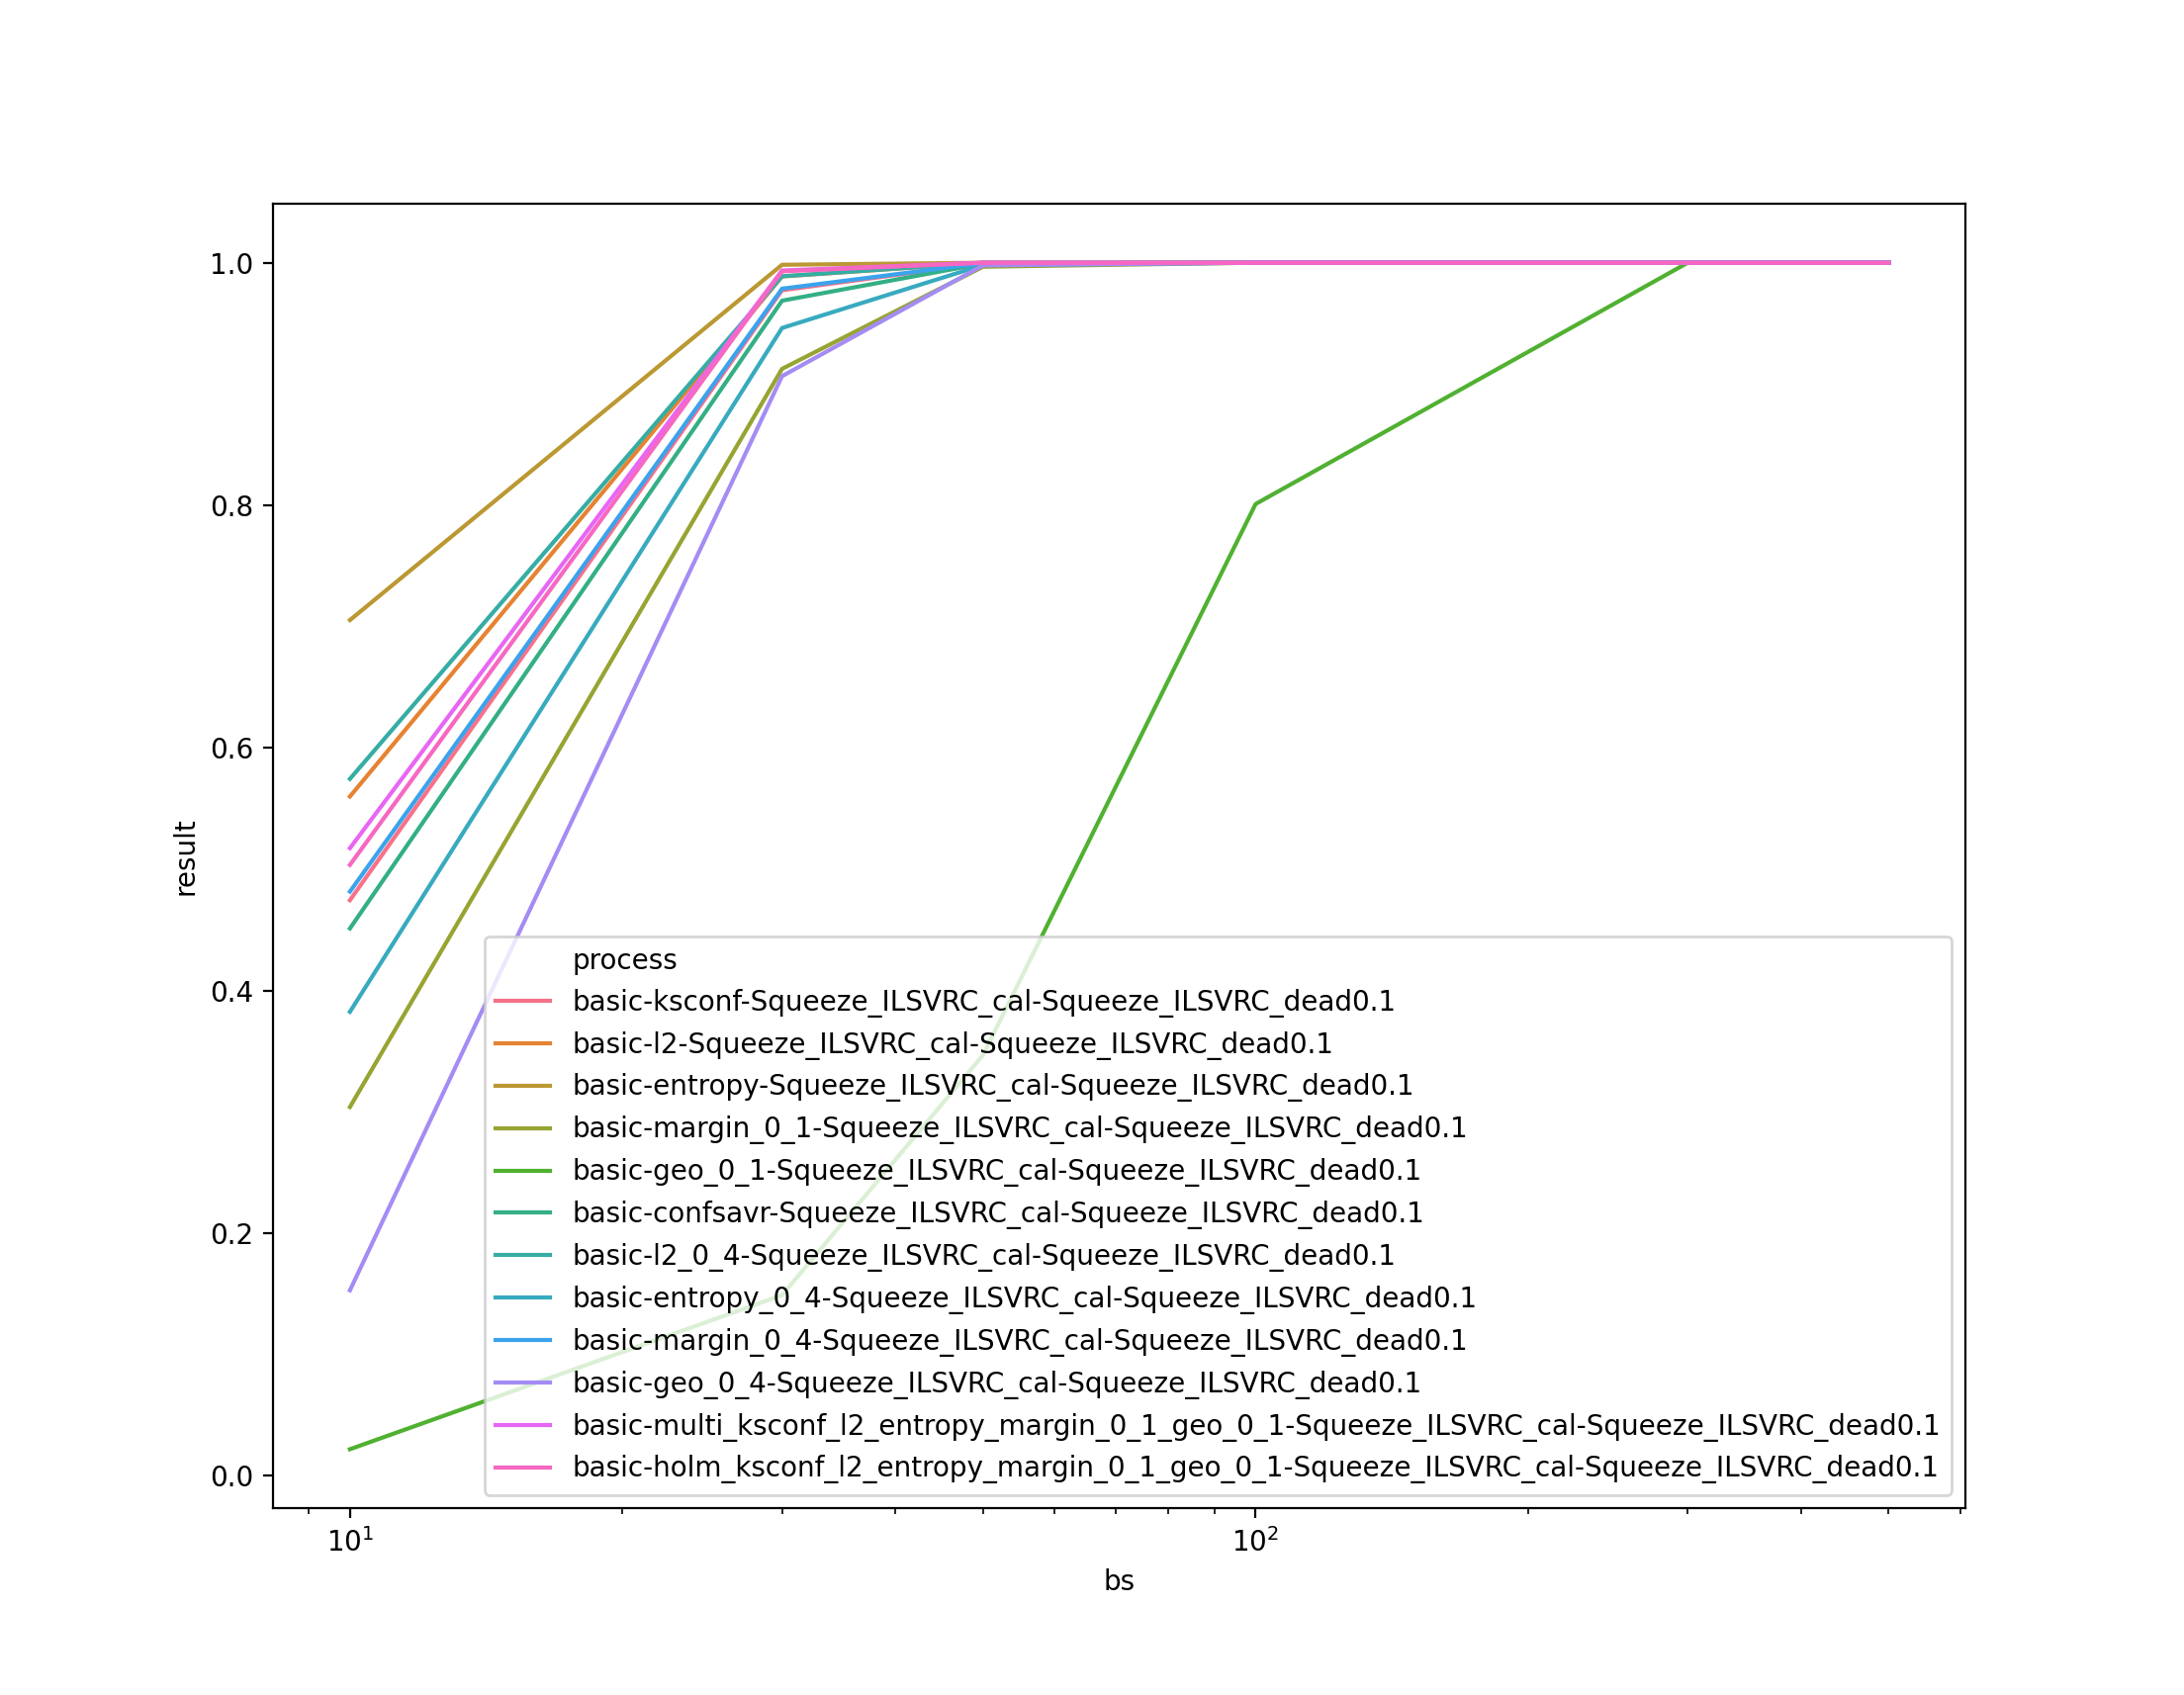

In [21]:
ana_per_set[0].plot_roc("alpha", 0.01, from_to=(10,500))

<IPython.core.display.Javascript object>


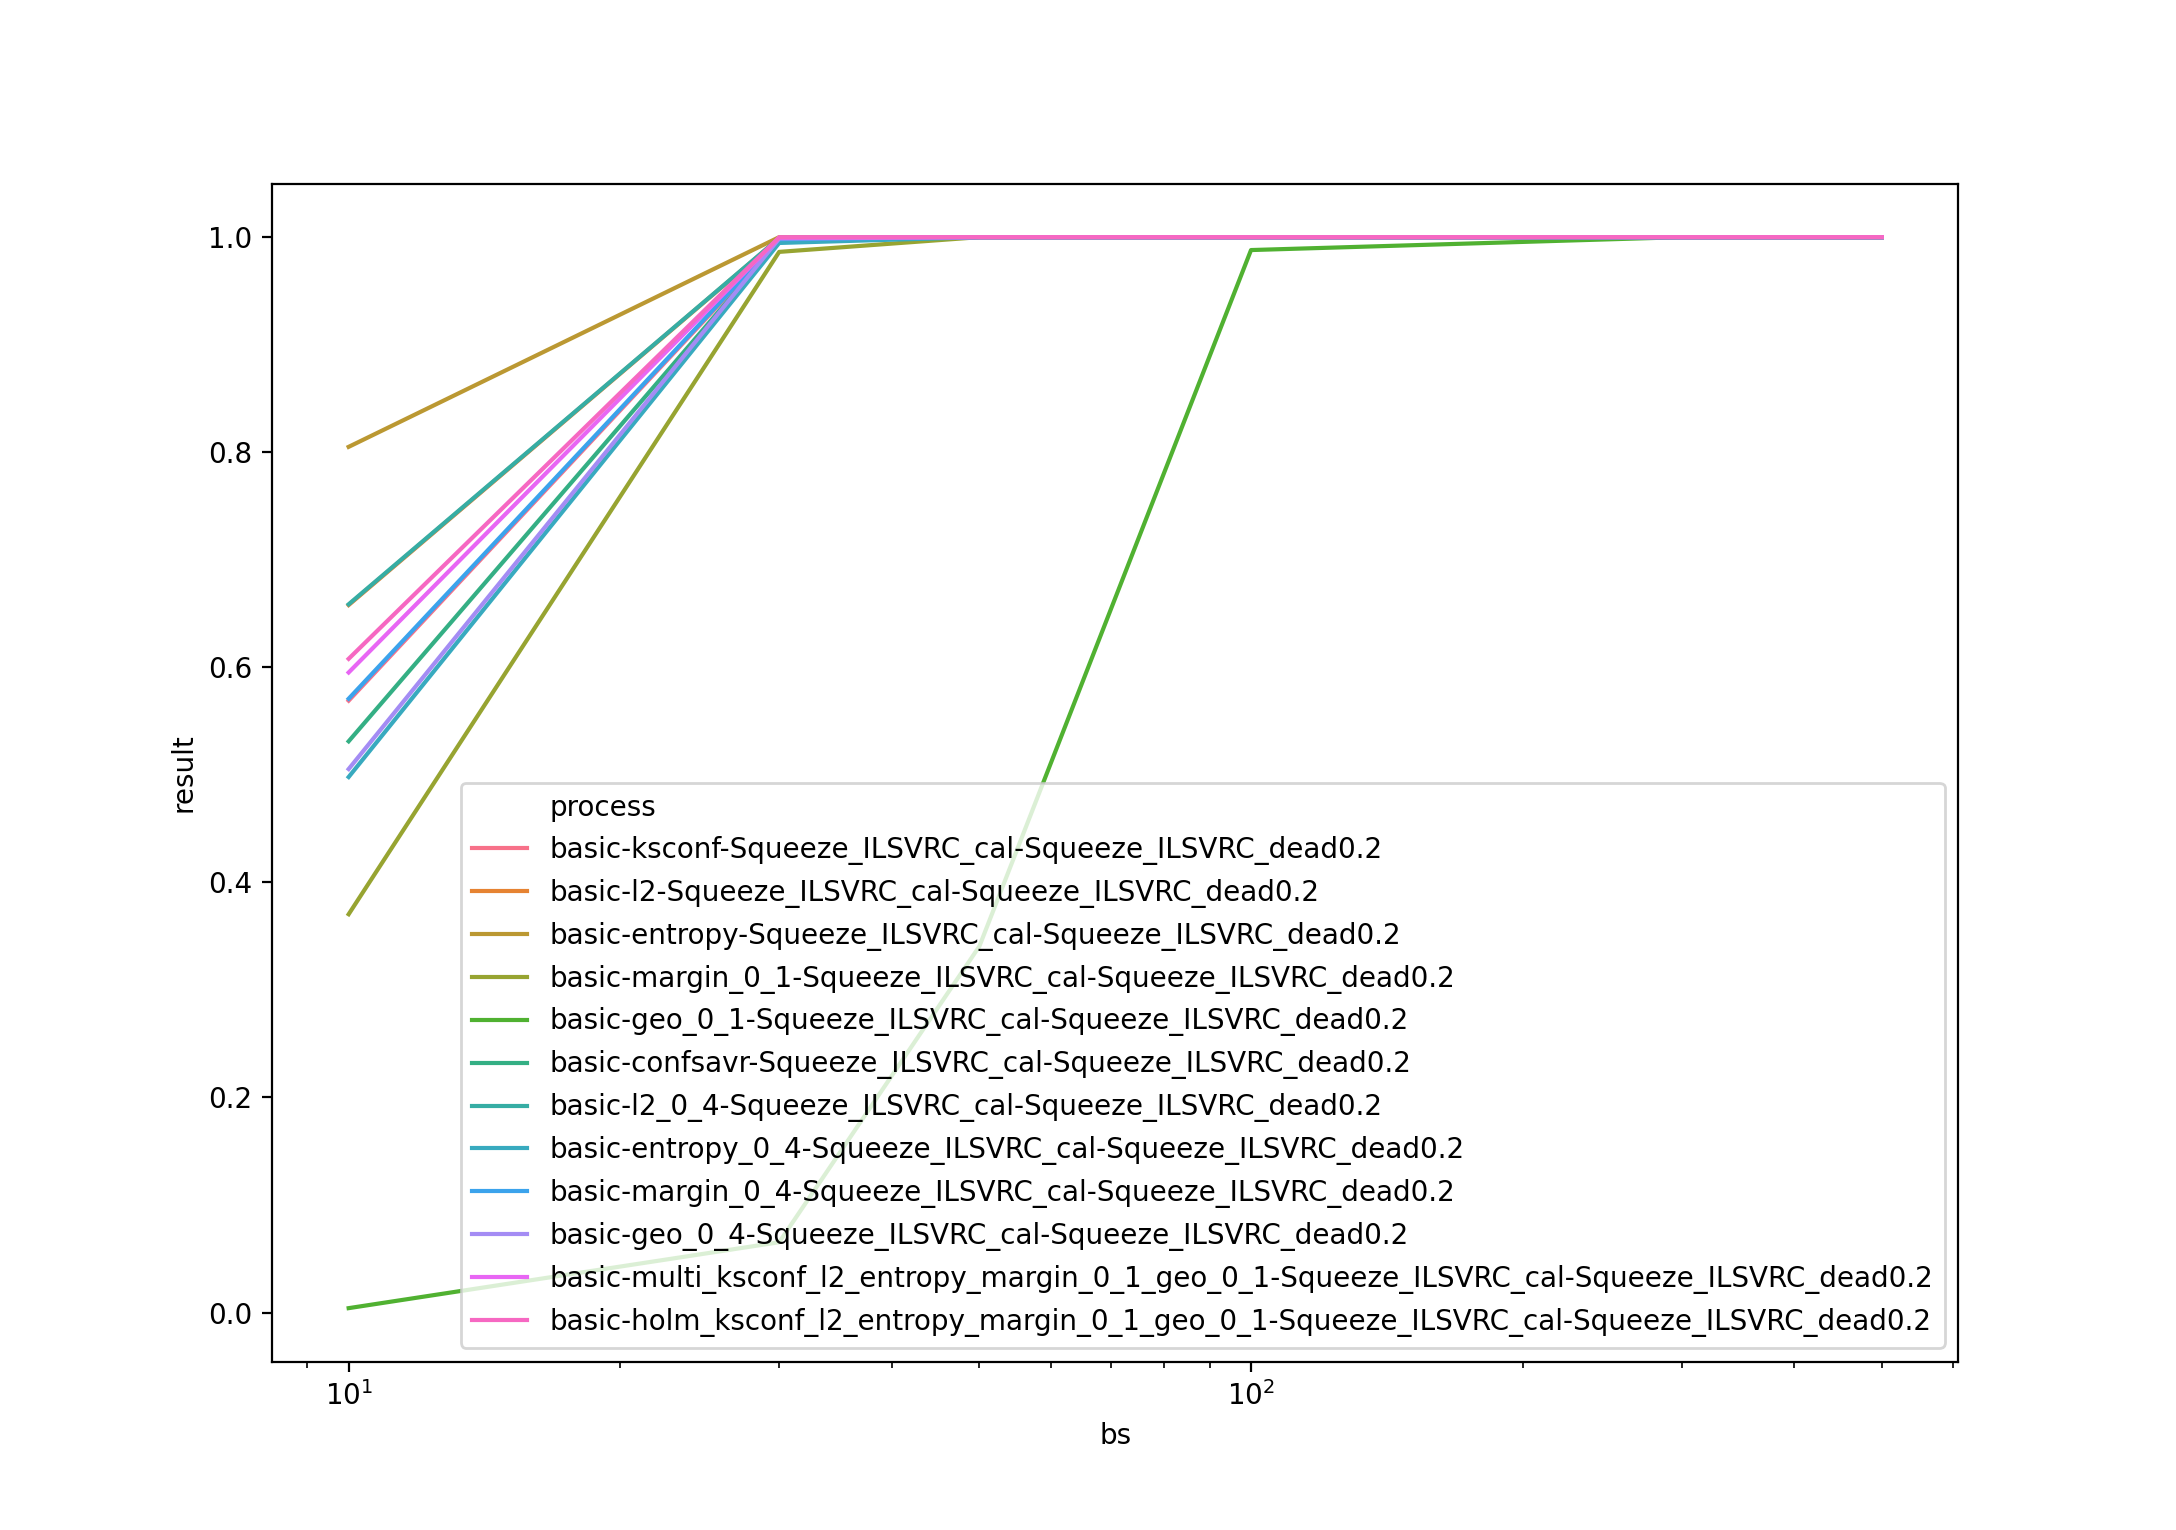

In [24]:
ana_per_set[1].plot_roc("alpha", 0.01, from_to=(10,500))

<IPython.core.display.Javascript object>


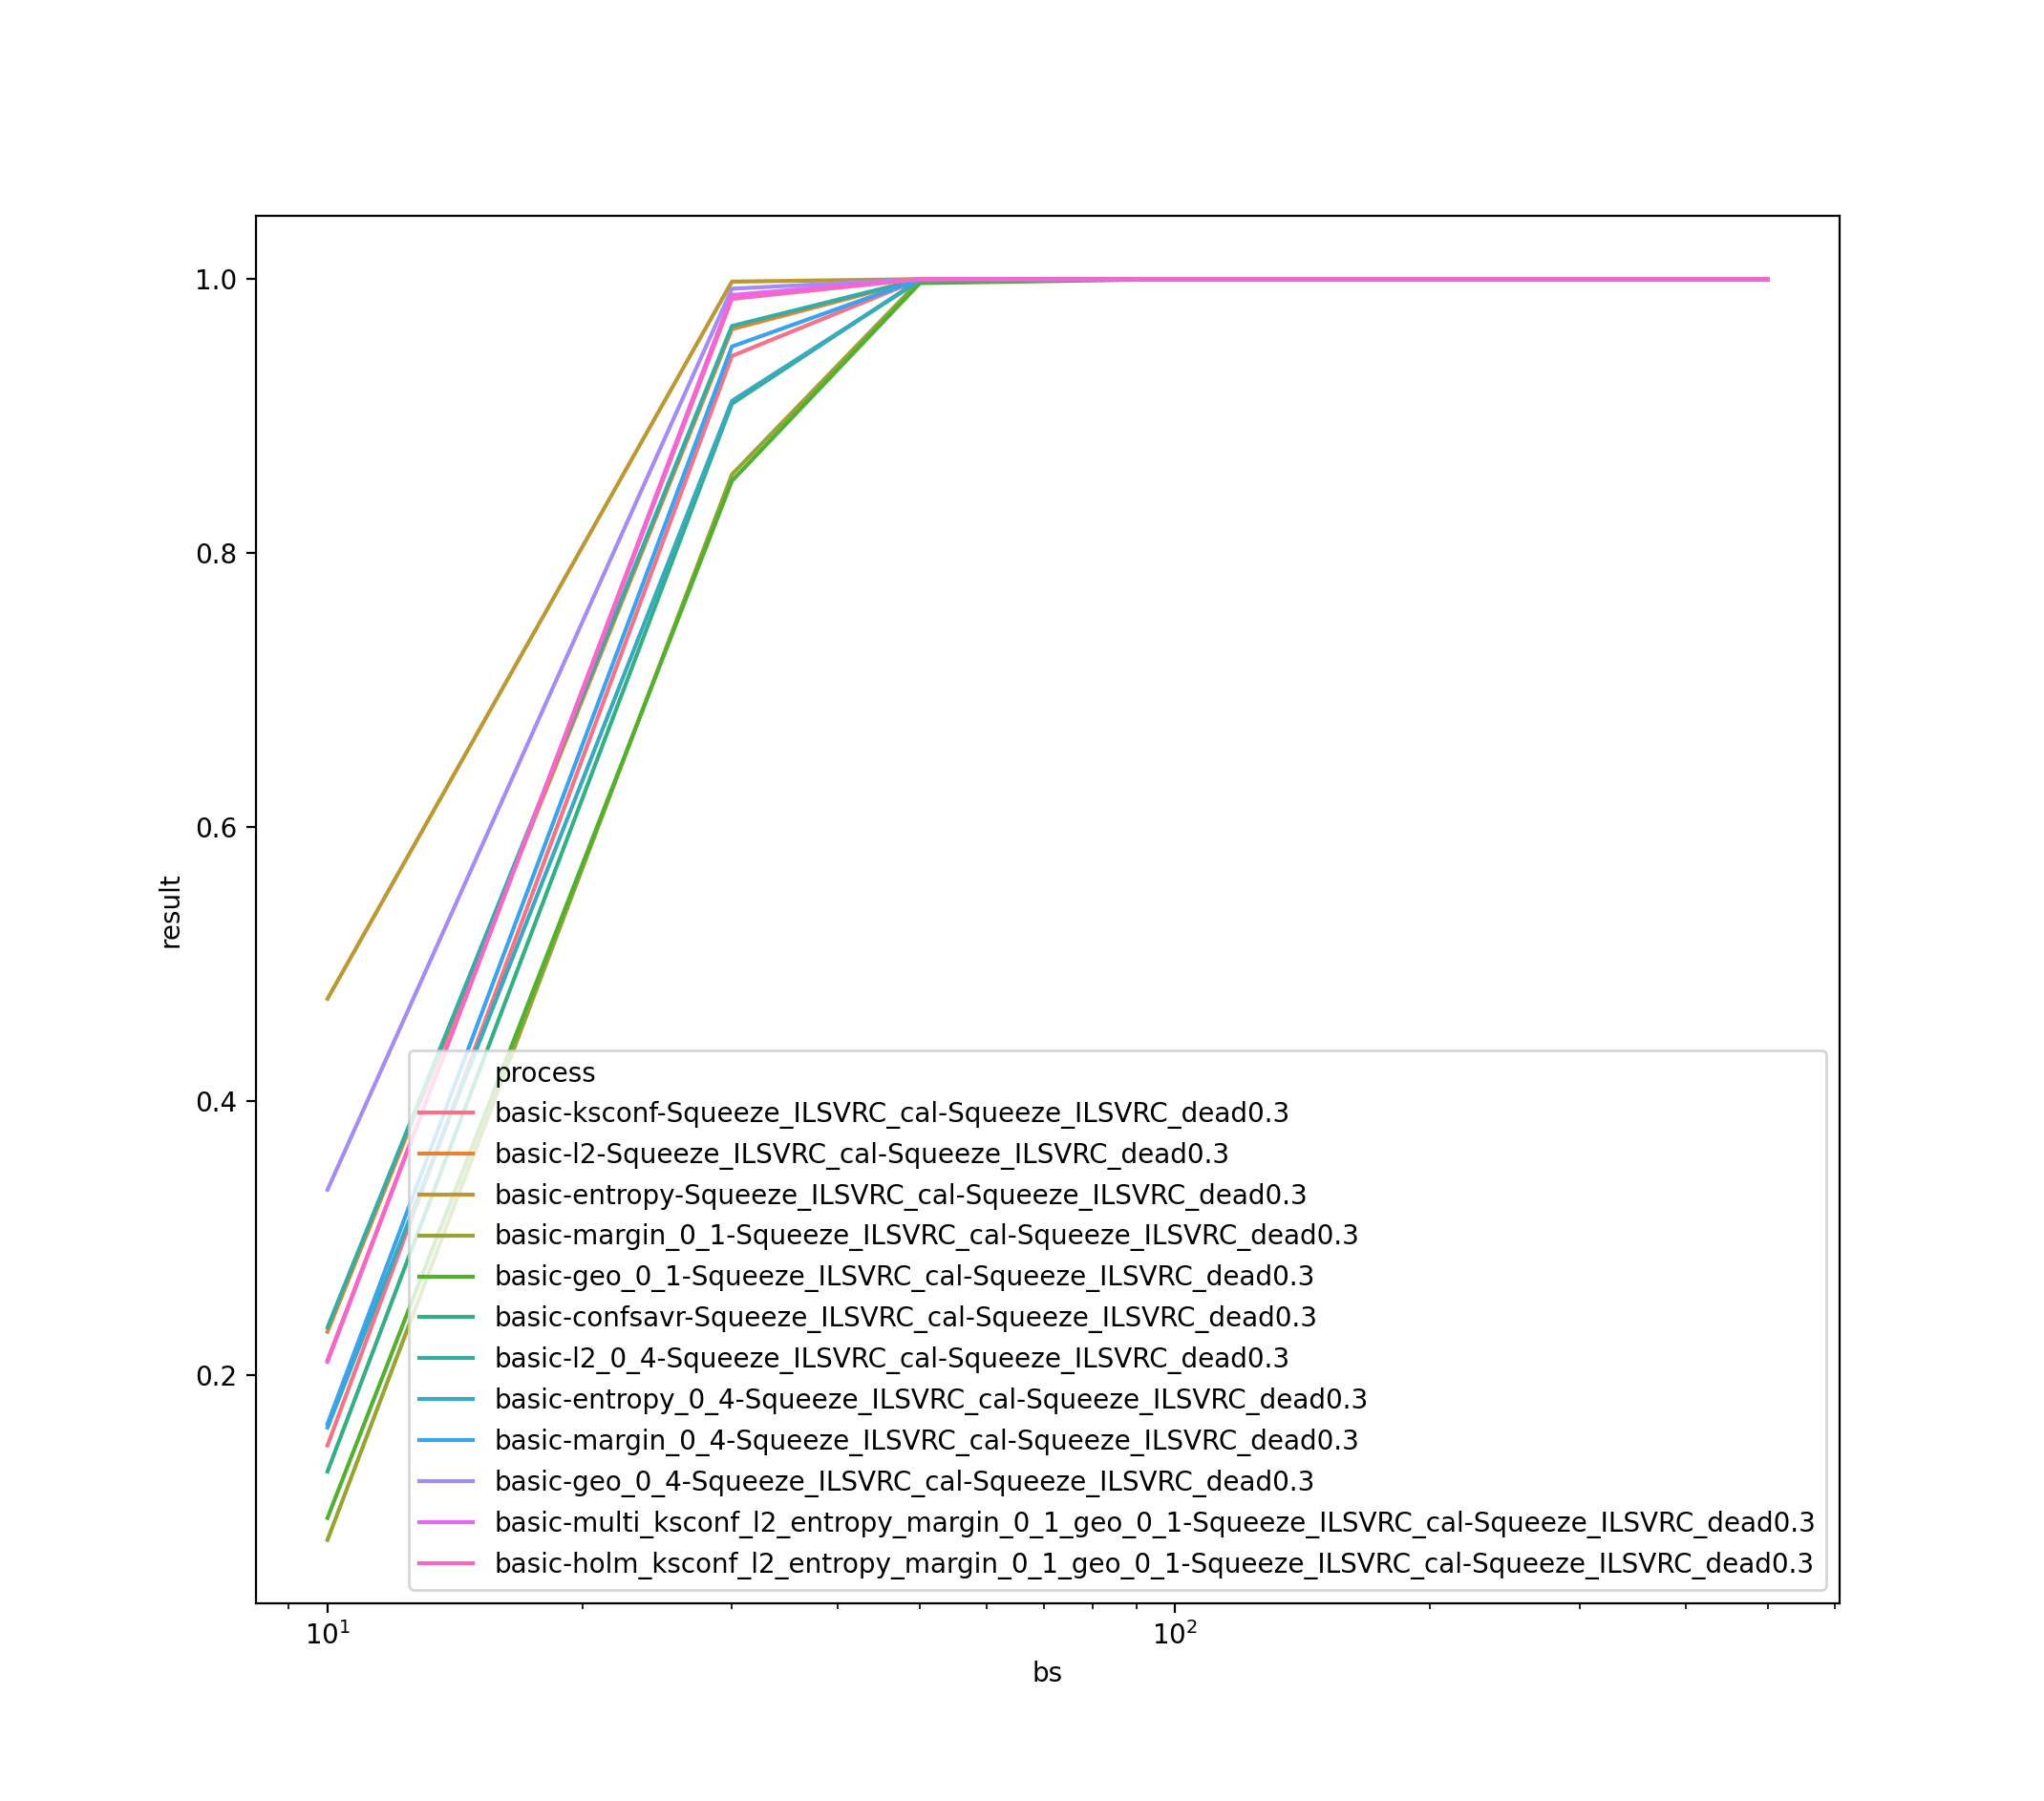

In [25]:
ana_per_set[2].plot_roc("alpha", 0.01, from_to=(10,500))

In [108]:
df_per_set = [a.compose_report()[(df["bs"]>= 10) & (df["bs"]<=500)] for a in ana_per_set]

In [109]:
df_per_set[1]

,bs,alpha,basic-confsavr-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-entropy_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-geo_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-holm_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-ksconf-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-l2-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-l2_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-margin_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-margin_0_4-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2,basic-multi_ksconf_l2_entropy_margin_0_1_geo_0_1-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2
3,10.0,0.01,0.5312,0.805,0.4980,0.0041,0.5054,0.6079,0.569,0.6579,0.6586,0.3704,0.5708,0.5952
4,30.0,0.01,0.9963,1.000,0.9946,0.0654,0.9987,0.9999,0.997,0.9990,0.9992,0.9863,0.9980,0.9995
5,50.0,0.01,1.0000,1.000,1.0000,0.3406,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000
6,100.0,0.01,1.0000,1.000,1.0000,0.9880,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000
7,300.0,0.01,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000
8,500.0,0.01,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000


In [117]:
ana_cut_comp[1].compose_report()[(df["bs"]>= 10) & (df["bs"]<=500)]

IndexError: list index out of range

In [2]:
import numpy as np

In [12]:
np.array([1,2,3,4,5])[:3]

array([1, 2, 3])

In [13]:
np.array([1,2,3,4,5])[3:]

array([4, 5])

In [54]:
d1 = np.loadtxt("data/ResNet50_ILSVRC_cal_data+dead_percent0.01.csv", delimiter=",").shape

In [55]:
d2 = np.loadtxt("data/ResNet50_ILSVRC_cal_data+dead_percent0.01 (krk's conflicted copy 2020-11-25).csv", delimiter=",").shape

In [56]:
np.array_equal(d1, d2)

True

In [7]:
np.loadtxt("data/ResNet50_ILSVRC_cal_data+noise_sigma30.csv", delimiter=",").shape

(100000, 1000)

In [9]:
data = np.loadtxt("data/ResNet50_ILSVRC_cal_data+noise_sigma10.csv", delimiter=",")
batch = np.loadtxt("temp/49.csv", delimiter=",")

In [14]:
d = n

In [15]:
d.shape

(100000, 1000)

In [19]:
def join(sigma,labels):
    if labels:
        data = np.loadtxt("data/ResNet50_ILSVRC_cal_data+noise_sigma{0}_labels.csv".format(sigma), delimiter=",",  dtype="str")
        batch = np.loadtxt("temp/{0}_labels.csv".format(str(49)), delimiter=",",  dtype="str")
    else:
        data = np.loadtxt("data/ResNet50_ILSVRC_cal_data+noise_sigma{0}.csv".format(sigma), delimiter=",")
        batch = np.loadtxt("temp/{0}.csv".format(str(49)), delimiter=",")
    d = np.concatenate([data[:49000], batch, data[49000:]])
    print(d.shape)
    if labels:
        np.savetxt("ResNet50_ILSVRC_cal_data+noise_sigma{0}_labels.csv".format(sigma), d,  fmt="%s")
    else:
        np.savetxt("ResNet50_ILSVRC_cal_data+noise_sigma{0}.csv".format(sigma), d)

In [1]:
import numpy as np


In [9]:

path = "ResNet50_ILSVRC_cal_data+noise_sigma{0}.csv".format(5)
data = np.loadtxt("data/"+ path)
print(data.shape)
data = np.savetxt(path, data, delimiter=",")

ValueError: could not convert string to float: '9.512047171592712402e-01,1.298443786799907684e-02,1.252521388232707977e-02,9.060597047209739685e-03,3.274552989751100540e-03,1.305185724049806595e-03,1.204350148327648640e-03,8.618215797469019890e-04,7.424369105137884617e-04,5.617041606456041336e-04,4.977073404006659985e-04,3.825121675617992878e-04,3.756273945327848196e-04,3.117749874945729971e-04,2.935162920039147139e-04,2.650530950631946325e-04,2.551544166635721922e-04,2.429354353807866573e-04,2.167957427445799112e-04,1.750884985085576773e-04,1.531924790469929576e-04,1.407870149705559015e-04,1.174917051685042679e-04,1.098894717870280147e-04,1.014174631563946605e-04,9.361878619529306889e-05,8.229885861510410905e-05,8.146845357259735465e-05,6.949955422896891832e-05,6.667498382739722729e-05,6.455684342654421926e-05,6.220816430868580937e-05,6.074017073842696846e-05,6.040115113137289882e-05,4.739313226309604943e-05,4.549710502033121884e-05,4.490678838919848204e-05,4.293298843549564481e-05,3.922080577467568219e-05,3.832248694379813969e-05,3.462541280896402895e-05,3.295461647212505341e-05,3.294512134743854403e-05,3.289809319539926946e-05,3.269578883191570640e-05,3.040824049094226211e-05,2.961976315418723971e-05,2.656574906723108143e-05,2.617566860863007605e-05,2.595518162706866860e-05,2.591624979686457664e-05,2.522915747249498963e-05,2.498509820725303143e-05,2.438728915876708925e-05,2.427780600555706769e-05,2.383685750828590244e-05,2.226934702775906771e-05,2.094706542266067117e-05,2.065205080725718290e-05,1.841259836510289460e-05,1.810668254620395601e-05,1.763955151545815170e-05,1.688336851657368243e-05,1.650321610213723034e-05,1.649638761591631919e-05,1.641165181354153901e-05,1.628924655960872769e-05,1.545933992019854486e-05,1.537648495286703110e-05,1.488883935962803662e-05,1.474809869250748307e-05,1.437969331163913012e-05,1.392606372974114493e-05,1.370797599520301446e-05,1.364405579806771129e-05,1.351374157820828259e-05,1.346321369055658579e-05,1.329829410678939894e-05,1.325832909060409293e-05,1.298218921874649823e-05,1.275079921470023692e-05,1.273580255656270310e-05,1.179995251732179895e-05,1.160964620794402435e-05,1.136524406319949776e-05,1.076351600204361603e-05,1.067134417098714039e-05,1.036864068737486377e-05,1.030061503115575761e-05,9.791884622245561332e-06,9.599004442861769348e-06,9.529700946586672217e-06,9.328141459263861179e-06,8.997089025797322392e-06,8.705081199877895415e-06,8.367141163034830242e-06,8.256555702246259898e-06,8.253965461335610598e-06,8.193591384042520076e-06,7.903203368186950684e-06,7.873232789279427379e-06,7.637550879735499620e-06,7.427112905133981258e-06,7.361503321590134874e-06,7.201667358458507806e-06,6.992233920755097643e-06,6.898281299072550610e-06,6.711898095090873539e-06,6.415101324819261208e-06,6.405784461094299331e-06,6.351540832838509232e-06,6.176141596370143816e-06,6.131696864031255245e-06,6.109260084485867992e-06,6.030937584000639617e-06,5.992427759338170290e-06,5.933926786383381113e-06,5.783110282209236175e-06,5.769322797277709469e-06,5.649656941386638209e-06,5.623532160825561732e-06,5.596097253146581352e-06,5.500759471033234149e-06,5.451345714391209185e-06,5.418464297690661624e-06,5.316997430782066658e-06,5.290059561957605183e-06,5.076045454188715667e-06,5.074221007816959172e-06,5.000585588277317584e-06,4.990562047169078141e-06,4.946939043293241411e-06,4.912675194645998999e-06,4.904969500785227865e-06,4.886857823294121772e-06,4.878937033936381340e-06,4.870977591053815559e-06,4.859493856201879680e-06,4.781846200785366818e-06,4.779835762747097760e-06,4.749771960632642731e-06,4.741467364510754123e-06,4.559228727885056287e-06,4.526130851445486769e-06,4.258655280864331871e-06,4.208466179989045486e-06,4.177596110821468756e-06,4.143717887927778065e-06,4.063664164277724922e-06,4.059217644680757076e-06,3.988434400525875390e-06,3.897893293469678611e-06,3.761075049624196254e-06,3.696774228956201114e-06,3.663911456897039898e-06,3.658579771581571549e-06,3.612774662542506121e-06,3.571665274648694322e-06,3.495918690532562323e-06,3.330774688947713003e-06,3.326295427541481331e-06,3.321388476251740940e-06,3.279382553955656476e-06,3.237058990634977818e-06,3.236586735511082225e-06,3.210437853340408765e-06,3.202673724445048720e-06,3.146616336380247958e-06,3.133491190965287387e-06,3.054643229916109703e-06,3.029319941560970619e-06,2.997078354383120313e-06,2.989881295434315689e-06,2.939639443866326474e-06,2.914357764893793501e-06,2.859090500351157971e-06,2.856620994862169027e-06,2.849280463124159724e-06,2.817003860400291160e-06,2.761043106147553772e-06,2.716348035392002203e-06,2.708626425373950042e-06,2.666114369276328944e-06,2.644919732119888067e-06,2.627642516017658636e-06,2.615080575196770951e-06,2.614262712086201645e-06,2.613372771520516835e-06,2.603526809252798557e-06,2.572912762843770906e-06,2.563473344707745127e-06,2.530302253944682889e-06,2.514109610274317674e-06,2.490408405719790608e-06,2.447506631142459810e-06,2.368298964938730933e-06,2.362131908739684150e-06,2.332604935872950591e-06,2.312041033292189240e-06,2.291505779794533737e-06,2.272933670610655099e-06,2.231270400443463586e-06,2.218331928816041909e-06,2.201440338467364199e-06,2.068600224447436631e-06,2.064497039100388065e-06,2.057766778307268396e-06,2.034444833043380640e-06,1.988418262044433504e-06,1.987309360629296862e-06,1.944202494996716268e-06,1.935420868903747760e-06,1.907978912640828639e-06,1.883891627585398965e-06,1.880341187643352896e-06,1.858032419477240182e-06,1.836735918914200738e-06,1.832073849072912708e-06,1.816883923311252147e-06,1.792313582882343326e-06,1.762353576850728132e-06,1.729882569634355605e-06,1.727421135910844896e-06,1.713058281893609092e-06,1.698153937468305230e-06,1.682390575297176838e-06,1.680902300904563162e-06,1.676218289503594860e-06,1.658547375882335473e-06,1.633433498682279605e-06,1.629778466849529650e-06,1.610817093933292199e-06,1.606809632903605234e-06,1.602046381776744965e-06,1.578546630298660602e-06,1.564011427035438828e-06,1.557704536025994457e-06,1.543936718917393591e-06,1.506361741121509112e-06,1.502149871157598682e-06,1.499188783782301471e-06,1.493846866651438177e-06,1.485748384766338859e-06,1.476064312555536162e-06,1.459765258005063515e-06,1.387965085086761974e-06,1.377371404487348627e-06,1.342875066256965511e-06,1.286816541323787533e-06,1.271812493541801814e-06,1.271614792131003924e-06,1.269132326342514716e-06,1.251704475180304144e-06,1.214556050399551168e-06,1.213518658005341422e-06,1.203744318445387762e-06,1.188144210573227610e-06,1.178601223728037439e-06,1.169782876786484849e-06,1.169532993117172737e-06,1.168530729955818970e-06,1.159910539172415156e-06,1.154017468252277467e-06,1.152964728134975303e-06,1.152197455667192116e-06,1.133495061367284507e-06,1.129389488596643787e-06,1.113141365749470424e-06,1.105714090954279527e-06,1.093497189685876947e-06,1.070413873094366863e-06,1.067813968802511226e-06,1.062131445905833971e-06,1.055018287843267899e-06,1.045174144564953167e-06,1.042901999426248949e-06,1.040705228660954162e-06,1.036247681440727320e-06,1.027815869747428223e-06,1.008393724077905063e-06,9.943064469553064555e-07,9.916000180965056643e-07,9.912370160236605443e-07,9.868631423159968108e-07,9.866673735814401880e-07,9.858491694103577174e-07,9.774814770935336128e-07,9.734905006553162821e-07,9.720785101308138110e-07,9.547671879772678949e-07,9.531677847007813398e-07,9.389578394802811090e-07,9.375664831168251112e-07,9.368147857458097860e-07,9.339121334051014856e-07,9.336022230854723603e-07,9.308798780693905428e-07,9.221184313901176210e-07,9.082777978619560599e-07,9.075149591808440164e-07,8.940402267398894764e-07,8.733731533538957592e-07,8.678310905452235602e-07,8.676664151607837994e-07,8.654466796542692464e-07,8.578310257689736318e-07,8.562877837903215550e-07,8.519202765455702320e-07,8.466055874123412650e-07,8.343216109096829314e-07,8.297795943690289278e-07,8.207280757233093027e-07,8.167639293787942734e-07,8.143924219439213630e-07,7.961911023812717758e-07,7.944807407511689235e-07,7.906727432782645337e-07,7.893181077633926179e-07,7.880732937337597832e-07,7.807728366060473491e-07,7.785080811117950361e-07,7.764467682136455551e-07,7.749280257485224865e-07,7.741111289760738146e-07,7.698851050008670427e-07,7.630835057170770597e-07,7.476193104594131000e-07,7.438110287694144063e-07,7.407768976008810569e-07,7.368017804765258916e-07,7.352280704253644217e-07,7.349070187956385780e-07,7.332394602599379141e-07,7.313587389035092201e-07,7.278678708644292783e-07,7.258506684593157843e-07,7.225817739708872978e-07,7.201546736723685171e-07,6.858309689050656743e-07,6.853157969999301713e-07,6.784661650272028055e-07,6.763510782548110001e-07,6.731247594871092588e-07,6.554263336511212401e-07,6.554200240316276904e-07,6.531537906084849965e-07,6.524988975797896273e-07,6.447039027079881635e-07,6.401438668035552837e-07,6.339380433928454295e-07,6.316182634691358544e-07,6.301868893388018478e-07,6.300475092757551465e-07,6.247683472793141846e-07,6.140647883512428962e-07,6.125931122369365767e-07,6.116025019764492754e-07,6.062176680643460713e-07,5.935474405305285472e-07,5.905329771849210374e-07,5.828126177220838144e-07,5.803710791951743886e-07,5.792541060145595111e-07,5.761737043030734640e-07,5.732600811825250275e-07,5.667521918439888395e-07,5.652138383993587922e-07,5.615961526928003877e-07,5.570908570007304661e-07,5.492594823408580851e-07,5.464803507493343204e-07,5.441401640382537153e-07,5.409658001553907525e-07,5.399334668254596181e-07,5.349729690351523459e-07,5.321047638062736951e-07,5.260309308141586371e-07,5.226381745160324499e-07,5.204014996706973761e-07,5.187569058762164786e-07,5.120427886140532792e-07,5.008739663026062772e-07,4.991625246475450695e-07,4.960977548762457445e-07,4.960972432854759973e-07,4.935056949761928990e-07,4.903736794403812382e-07,4.819767127628438175e-07,4.799355792783899233e-07,4.752252777961984975e-07,4.729154738924989942e-07,4.706253946551441913e-07,4.681048437760182424e-07,4.647699825000017881e-07,4.622600613402028102e-07,4.588819422224332811e-07,4.520580887401592918e-07,4.456105955341627123e-07,4.451361803603504086e-07,4.416691297137731453e-07,4.398851274345361162e-07,4.392006189846142661e-07,4.367288113371614600e-07,4.347363073975429870e-07,4.344134367784135975e-07,4.319809363551030401e-07,4.285558929950639140e-07,4.254524412772298092e-07,4.231702064316777978e-07,4.231330592574522598e-07,4.229329704230622156e-07,4.224798715313227149e-07,4.215843603105895454e-07,4.209246924347098684e-07,4.207151960144983605e-07,4.187581623682490317e-07,4.184978479315759614e-07,4.152200858698051888e-07,4.111527971417672234e-07,4.070721502102969680e-07,4.045855064305214910e-07,4.045635080274223583e-07,4.035443055272480706e-07,4.027495776881551137e-07,4.020427013529115357e-07,4.017104231479606824e-07,4.012421754850947764e-07,3.989877939147845609e-07,3.976036282438144553e-07,3.972651825279172044e-07,3.937595920433523133e-07,3.900724721006554319e-07,3.881017676121700788e-07,3.861966320073406678e-07,3.860791650822648080e-07,3.850059044907538919e-07,3.824971486210415605e-07,3.708463793827831978e-07,3.700525041949731531e-07,3.696856936130643589e-07,3.679705855574866291e-07,3.672809611998673063e-07,3.658707043996400898e-07,3.657011689028877299e-07,3.652195061931706732e-07,3.544980700098676607e-07,3.544940057054191129e-07,3.510691044539271388e-07,3.498645355648477562e-07,3.492424980322539341e-07,3.465229951871151570e-07,3.438217390794306993e-07,3.411350633086840389e-07,3.407614315165119478e-07,3.393710983345954446e-07,3.391103575722809182e-07,3.389354503724462120e-07,3.349503003846621141e-07,3.343770913488697261e-07,3.343576224779098993e-07,3.276414588526677107e-07,3.272548667609953554e-07,3.267776946813683026e-07,3.229502851809229469e-07,3.202534628599096322e-07,3.201010940756532364e-07,3.197237106178363319e-07,3.167032787132484373e-07,3.138534907520806883e-07,3.106611927705671405e-07,3.106312931322463555e-07,3.099217167346068891e-07,3.095586578183429083e-07,3.089558333613240393e-07,3.060619349071203033e-07,3.050533905479824170e-07,3.045455798655893886e-07,2.936922669505293015e-07,2.909984857524250401e-07,2.903409495047526434e-07,2.889162544761347817e-07,2.841620982962922426e-07,2.826229490437981440e-07,2.811628974086488597e-07,2.802206608976121061e-07,2.752691443674848415e-07,2.697229035675263731e-07,2.674598249541304540e-07,2.671694403488800162e-07,2.669183629677718272e-07,2.655858111211273354e-07,2.620529073737998260e-07,2.549458315570518607e-07,2.532171947677852586e-07,2.531128870941756759e-07,2.530467497763311258e-07,2.526804507851920789e-07,2.501070071048161481e-07,2.493092381428141380e-07,2.477092948538484052e-07,2.450833846978639485e-07,2.422403326818312053e-07,2.399852974122040905e-07,2.392275746387895197e-07,2.391413431723776739e-07,2.339728553124587052e-07,2.335938518172042677e-07,2.316549085890073911e-07,2.309783155851619085e-07,2.307275650537121692e-07,2.290458098741510184e-07,2.254713393767815433e-07,2.238575547153232037e-07,2.236194376337152789e-07,2.222682553565391572e-07,2.219632335709320614e-07,2.149382964944379637e-07,2.129916509829854476e-07,2.127399199025603593e-07,2.105557967979621026e-07,2.099576477121445350e-07,2.080932119952194626e-07,2.050937979447553516e-07,2.049115721547423163e-07,2.048414415867227945e-07,2.026817753630894003e-07,2.014038926745342906e-07,1.994686869011275121e-07,1.982125894528508070e-07,1.979587125333637232e-07,1.977632138050466892e-07,1.970619223357061855e-07,1.935237179395699059e-07,1.908067019940062892e-07,1.869966581580229104e-07,1.868388892489747377e-07,1.867539225486325449e-07,1.864652574568026466e-07,1.855601823308461462e-07,1.855067495171169867e-07,1.848616193456109613e-07,1.842025625364840380e-07,1.830967164551111637e-07,1.819725099494462484e-07,1.814344585682192701e-07,1.812449141880279058e-07,1.804656619697198039e-07,1.799557622916836408e-07,1.790283334912601276e-07,1.777927280954827438e-07,1.774921969399656518e-07,1.770141437873462564e-07,1.762384727044263855e-07,1.757409933134113089e-07,1.747506104265994509e-07,1.746799540569554665e-07,1.740316406539932359e-07,1.735850787554227281e-07,1.730155645418562926e-07,1.727351133240517811e-07,1.726480007846475928e-07,1.725296527865793905e-07,1.713776356382368249e-07,1.706043804006185383e-07,1.701799305919848848e-07,1.634021771224070108e-07,1.623803171924009803e-07,1.614804574501249590e-07,1.587201552410988370e-07,1.587056317475799005e-07,1.580041555371280992e-07,1.576609633957559709e-07,1.575452301949553657e-07,1.570304277720424579e-07,1.558840523330218275e-07,1.552148773953376804e-07,1.542024534728625440e-07,1.537366927095717983e-07,1.534683207182752085e-07,1.528700011022010585e-07,1.526369288740170305e-07,1.517532837169710547e-07,1.508202274180803215e-07,1.506286366748099681e-07,1.505667341916705482e-07,1.501312709706326132e-07,1.482616767134459224e-07,1.443916630705643911e-07,1.435590490928007057e-07,1.432134979495458538e-07,1.429805536190542625e-07,1.420736737145489315e-07,1.392693889101792593e-07,1.380495149305716041e-07,1.366189223972469335e-07,1.365419421972546843e-07,1.357970660365026561e-07,1.348401497125450987e-07,1.345995173096525832e-07,1.345984941281130887e-07,1.343814801657572389e-07,1.339832493840731331e-07,1.339447948112137965e-07,1.338494115543653606e-07,1.326417020663939184e-07,1.320169076279853471e-07,1.314261055540555390e-07,1.291211759735233500e-07,1.285128234940202674e-07,1.276396233151899651e-07,1.275326724226033548e-07,1.271709919592467486e-07,1.269841192197418422e-07,1.265028117813926656e-07,1.242216427499442943e-07,1.217923681906540878e-07,1.210436550991289550e-07,1.207571358463610522e-07,1.207560984539668425e-07,1.197051346935040783e-07,1.168335188594937790e-07,1.156690956349848420e-07,1.151703585833274701e-07,1.127283013602209394e-07,1.120130832532595377e-07,1.113127012786208070e-07,1.098701289947712212e-07,1.095674164730553457e-07,1.089500472062354675e-07,1.073522213346222998e-07,1.066978683184061083e-07,1.065851833459419140e-07,1.044283877149609907e-07,1.009869521340078791e-07,1.009214827263349434e-07,1.006089789257202938e-07,9.949395263220139896e-08,9.848403692558349576e-08,9.765706465714174556e-08,9.750631591032288270e-08,9.745722451270921738e-08,9.712969273323324160e-08,9.699176217736749095e-08,9.668811173924041213e-08,9.594629091225215234e-08,9.570247527790343156e-08,9.447698090525591397e-08,9.396390510119090322e-08,9.362668151879915968e-08,9.185553295765203075e-08,9.090997821203927742e-08,9.071355577816575533e-08,9.015056434691359755e-08,8.935130324516649125e-08,8.818140173616484390e-08,8.697039532989947475e-08,8.633425352400081465e-08,8.625326586297887843e-08,8.596961720286344644e-08,8.572760634706355631e-08,8.546491869765304727e-08,8.535641882190247998e-08,8.518483696207113098e-08,8.504570558898194577e-08,8.489660530131004634e-08,8.476780521959881298e-08,8.464356682225115946e-08,8.372336424145032652e-08,8.301923770659414004e-08,8.300546028294775169e-08,8.295798181734426180e-08,8.181073951618600404e-08,8.171390675215661759e-08,8.151946673251586617e-08,8.151014441182269366e-08,8.118601613205100875e-08,8.033204323965037474e-08,8.016306907165926532e-08,7.981125804690236691e-08,7.958642811445315601e-08,7.866431417369312840e-08,7.840502291855955264e-08,7.739704699361027451e-08,7.683400582436661352e-08,7.661945744530385127e-08,7.643773614063320565e-08,7.641178711992324679e-08,7.604757001899997704e-08,7.575339822096793796e-08,7.479648189701038064e-08,7.475298247072714730e-08,7.433354909380796016e-08,7.423918191307166126e-08,7.380081967767182505e-08,7.286481462642768747e-08,7.252123879197824863e-08,7.217996511599267251e-08,7.176716820822548470e-08,7.094769927107336116e-08,7.013852609816240147e-08,6.981645839232442086e-08,6.965990451135439798e-08,6.964594945202406961e-08,6.907431782110506902e-08,6.901544935544734471e-08,6.873798952256038319e-08,6.831984933342027944e-08,6.828337717479371349e-08,6.726976664594985778e-08,6.719448464309607516e-08,6.563980292639826075e-08,6.545552366787887877e-08,6.543917407952903886e-08,6.539163166507933056e-08,6.497798921145658824e-08,6.453974776832183124e-08,6.312012601483729668e-08,6.283808318130468251e-08,6.252734863210207550e-08,6.154738940722381813e-08,6.090278503734225524e-08,6.022528253879499971e-08,6.013976161511891405e-08,6.002161256901672459e-08,5.998922603112077923e-08,5.939333291848925001e-08,5.873564745684234367e-08,5.866018781830462103e-08,5.834229099832555221e-08,5.808469438761676429e-08,5.733215502345956338e-08,5.728580987351961085e-08,5.721723539409140358e-08,5.699286020899307914e-08,5.617823006787148188e-08,5.609653186411378556e-08,5.525001611772495380e-08,5.514599621392335393e-08,5.478085896015727485e-08,5.456469054365697957e-08,5.411786219156056177e-08,5.268093516974658996e-08,5.246564072081127961e-08,5.234119981878393446e-08,5.167490257917961571e-08,5.149848192331774044e-08,5.113252043997817964e-08,5.040521600108149869e-08,5.011207449001631176e-08,4.973736977831322292e-08,4.971688127852758043e-08,4.953779253469292598e-08,4.927563068690687942e-08,4.920200069591373904e-08,4.868724801099233446e-08,4.810570786162315926e-08,4.785970375564829737e-08,4.710755518999576452e-08,4.710333101343167073e-08,4.708850909196371504e-08,4.703420231066957058e-08,4.653813689969865663e-08,4.631233707641513320e-08,4.596604341600141197e-08,4.580754264793540642e-08,4.536601139193408017e-08,4.523105801013116434e-08,4.468492065257123613e-08,4.455717217410892772e-08,4.443377221718947112e-08,4.407360876257371274e-08,4.330060576762662095e-08,4.295765876349832979e-08,4.264914110763129429e-08,4.225562122428527800e-08,4.222782123974866408e-08,4.210910731217154535e-08,4.210477300148340873e-08,4.175862500233051833e-08,4.128574460082745645e-08,4.119953089798400470e-08,4.104955664274712035e-08,4.047183921329633449e-08,4.033474709785878076e-08,3.992433761368374689e-08,3.967224415646342095e-08,3.937425319122667133e-08,3.919157975929010718e-08,3.857654107264352206e-08,3.854859187413239852e-08,3.818496807639348845e-08,3.800020564881378959e-08,3.779722490548920177e-08,3.708256812728905061e-08,3.706601958697319787e-08,3.703873829863368883e-08,3.651329549825277354e-08,3.638093559743538208e-08,3.636143830476612493e-08,3.569713769024929206e-08,3.523014768802568142e-08,3.491587108328531031e-08,3.461753550482171704e-08,3.444694485210675339e-08,3.425288142011595482e-08,3.420209182536382286e-08,3.416355909280355263e-08,3.381484603437456826e-08,3.380930024832196068e-08,3.351849997557110328e-08,3.351287247710388328e-08,3.317624219789649942e-08,3.313602547905247775e-08,3.284092997546395054e-08,3.277847326899063773e-08,3.232147705034549290e-08,3.189980546380866144e-08,3.188867481185297947e-08,3.142843496561908978e-08,3.135975390478051850e-08,3.118748637120916101e-08,3.110478985490772175e-08,3.089930800115325837e-08,3.065066067620136891e-08,3.060772257867938606e-08,3.059430042640087777e-08,3.040674201315596292e-08,3.027122019716443901e-08,3.025009220891661244e-08,2.976861601666769275e-08,2.975431101504000253e-08,2.958770295435897424e-08,2.949366439963796438e-08,2.944925725500979752e-08,2.943370169816716952e-08,2.900679341166778613e-08,2.893837880435512488e-08,2.860478254262943665e-08,2.842281077164443559e-08,2.841429846967002959e-08,2.821840894284832757e-08,2.798626574929130584e-08,2.774914875658396340e-08,2.751257177635579865e-08,2.657886177814816620e-08,2.653833597321408888e-08,2.639985474672812416e-08,2.627532325050196960e-08,2.601322712791898084e-08,2.590568293214801088e-08,2.536675935971288709e-08,2.475499805143499543e-08,2.454896019798979978e-08,2.384705233282602421e-08,2.351569783343165909e-08,2.314485314514058700e-08,2.274403776425515389e-08,2.250815001048067643e-08,2.248437880325582228e-08,2.219129591196633555e-08,2.188407677294890163e-08,2.155515410606767546e-08,2.085180383915030689e-08,2.062157200555247982e-08,2.061252857288309315e-08,2.042518332245890633e-08,2.023340250900673709e-08,2.022028589010460564e-08,1.991576326076938130e-08,1.976673402737105789e-08,1.926822079667545040e-08,1.926653148132118076e-08,1.902936119790865632e-08,1.842795960271814693e-08,1.792559700675155909e-08,1.790915860055974917e-08,1.756470702218848601e-08,1.751115163983740786e-08,1.749950051532778161e-08,1.715936015500574285e-08,1.666902349484189472e-08,1.610531263906977983e-08,1.607168087502941489e-08,1.599855359302182478e-08,1.594858645148633514e-08,1.594165333074215596e-08,1.569354246555576538e-08,1.563235940693630255e-08,1.554951012394667487e-08,1.552325734621717856e-08,1.550032635577736073e-08,1.547335770624158613e-08,1.534811211456599267e-08,1.485851708338259414e-08,1.432671226098136685e-08,1.413462413779598137e-08,1.376809155573255339e-08,1.344397304592348519e-08,1.312806041653402644e-08,1.268913152330242156e-08,1.263949300778222096e-08,1.242425540226577141e-08,1.233187241211908258e-08,1.229978430217215646e-08,1.229094337418246141e-08,1.228580970291659469e-08,1.177337338731376803e-08,1.174338848386469181e-08,1.157381124272660600e-08,1.144848926770691833e-08,1.131834892476035748e-08,1.126240167792502689e-08,1.124392046136790668e-08,1.119444714703377031e-08,1.113696690424603730e-08,1.112405900727253538e-08,1.098471269500578273e-08,1.097526780569069160e-08,1.077526956549945680e-08,1.077481748268382944e-08,1.064455545929376967e-08,1.040509722827209771e-08,1.031137131235482229e-08,1.025181450842183040e-08,1.005907002138428652e-08,1.003626426410164640e-08,9.966655056814488489e-09,9.775522613608700340e-09,9.652111998548207339e-09,9.589500749029866711e-09,9.528768885047611548e-09,9.514439902602589427e-09,9.460965344487703987e-09,8.989776922874170850e-09,8.967599995912678423e-09,8.681721119785379415e-09,8.602551559988569352e-09,8.475580237643498549e-09,8.343048918391104962e-09,8.336081158688557480e-09,8.276038521159989614e-09,8.171947563084813737e-09,8.109079630003179773e-09,7.901284959643817274e-09,7.873198093477640214e-09,7.546292479787553020e-09,7.390882572622103908e-09,7.182794359295030517e-09,7.132418211597268964e-09,7.097108234432880636e-09,6.910748862054560959e-09,6.905978899851561437e-09,6.639033323097009998e-09,6.610742175894301909e-09,6.607754343690430687e-09,6.505334937401130446e-09,6.318019885043213435e-09,6.030928201283813905e-09,6.028639365496246683e-09,5.553588700024647551e-09,5.417422510589631202e-09,5.090459609391473350e-09,4.550855692286859266e-09,4.512237694598297821e-09,4.431804700999464330e-09,4.349867577246868677e-09,4.119487417852951694e-09,4.082224780432852640e-09,4.060915159698197385e-09,3.995898278930098968e-09,3.876149623494029584e-09,3.720780794580491602e-09,3.423131333946116683e-09,3.246009905311098009e-09,3.040452334346355201e-09,2.932816434153551199e-09,2.559687795056220239e-09,2.187505288020474836e-09,2.178444979961113859e-09,2.073997862339638232e-09,1.895671841722901263e-09,1.639390956320596615e-09,1.615825806489112892e-09,1.543338234988311797e-09,1.477908573299657746e-09,1.454701692438220562e-09,1.443160813074939597e-09,1.369080737667616177e-09,1.254055193022907133e-09,1.240251346068532712e-09,1.137163918585315514e-09,1.134899507704290045e-09,9.174933590649914095e-10,8.353394087556864633e-10,6.292136811580917310e-10,5.757186394284019570e-10,3.524268099575067481e-10,3.096482514841625289e-10,2.643540109037445518e-10,1.826550161121431870e-10'

In [23]:
join(20, False)

(100000, 1000)


In [11]:
from data_wrapper import RawData
from process import Process
from classify import *
from analyse import DataAnalysis, Analysis
import util
import seaborn as sns
%matplotlib notebook
from matplotlib import pyplot as plt

In [12]:
calibration_data = RawData("ResNet50_ILSVRC_cal_data.csv", "Res_ILSCRC_cal")
test_data = RawData("ResNet50_ILSVRC_cal_data+noise_sigma50.csv", "Res_AwA_cal")

p = [Process(calibration_data, test_data, EntropyClassifier())]
av = p[0].get_avrg_distr()

KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots()
col = ["r", "b"]
j = 0
for k, v in av.items():
    for h, d in v.items():
        print( k, h, d.shape)
        print("-"*100)
        if d is not None:
            sns.lineplot(y=d, x=list(range(d.shape[0])), color=col[j], ax=axs, label="-".join([k, h]))
            j += 1
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [4]:
s="fig/basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.1-basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.2-basic-entropy-Squeeze_ILSVRC_cal-Squeeze_ILSVRC_dead0.3.jpg"

In [5]:
print(s.replace("_", "\_"))

fig/basic-entropy-Squeeze\_ILSVRC\_cal-Squeeze\_ILSVRC\_dead0.1-basic-entropy-Squeeze\_ILSVRC\_cal-Squeeze\_ILSVRC\_dead0.2-basic-entropy-Squeeze\_ILSVRC\_cal-Squeeze\_ILSVRC\_dead0.3.jpg


In [10]:
import numpy as np
import pandas as pd

In [9]:
np.log(np.array([[1,2,3,4],[1,2,3,0.4]]))

array([[ 0.        ,  0.69314718,  1.09861229,  1.38629436],
       [ 0.        ,  0.69314718,  1.09861229, -0.91629073]])

In [26]:
df = pd.read_csv("config/ResCal_multi_ksconf_entropy_geo_0_1_margin_0_1_l2.csv", sep=",", names=["bs", "alpha", "iter", "result"])
df["result"] = df["result"]/df["iter"]
df["diff"] = df["result"]/df["alpha"]

In [33]:
res = []

for i in df.groupby("alpha"):
    print(i[0])
    print(i[1])
    print(i[1].mean())
    res += list(i[1]["result"] * (1/i[1]["diff"].mean()))
df["diff"].mean()
df["res"] = res
df

0.001
         bs  alpha     iter  result  diff
0       5.0  0.001  10000.0  0.0004   0.4
1      10.0  0.001  10000.0  0.0004   0.4
2      30.0  0.001  10000.0  0.0007   0.7
3      50.0  0.001  10000.0  0.0007   0.7
4     100.0  0.001  10000.0  0.0003   0.3
5     300.0  0.001  10000.0  0.0004   0.4
6     500.0  0.001  10000.0  0.0007   0.7
7    1000.0  0.001  10000.0  0.0004   0.4
8    3000.0  0.001  10000.0  0.0005   0.5
9    5000.0  0.001  10000.0  0.0010   1.0
10  10000.0  0.001  10000.0  0.0010   1.0
bs         1817.727273
alpha         0.001000
iter      10000.000000
result        0.000591
diff          0.590909
dtype: float64
0.005
         bs  alpha     iter  result  diff
11      5.0  0.005  10000.0  0.0030  0.60
12     10.0  0.005  10000.0  0.0022  0.44
13     30.0  0.005  10000.0  0.0028  0.56
14     50.0  0.005  10000.0  0.0016  0.32
15    100.0  0.005  10000.0  0.0029  0.58
16    300.0  0.005  10000.0  0.0019  0.38
17    500.0  0.005  10000.0  0.0029  0.58
18   1000.0  0.005

,bs,alpha,iter,result,diff,res
0,5.0,0.001,10000.0,0.0004,0.400,0.000677
1,10.0,0.001,10000.0,0.0004,0.400,0.000677
2,30.0,0.001,10000.0,0.0007,0.700,0.001185
3,50.0,0.001,10000.0,0.0007,0.700,0.001185
4,100.0,0.001,10000.0,0.0003,0.300,0.000508
5,300.0,0.001,10000.0,0.0004,0.400,0.000677
6,500.0,0.001,10000.0,0.0007,0.700,0.001185
7,1000.0,0.001,10000.0,0.0004,0.400,0.000677
8,3000.0,0.001,10000.0,0.0005,0.500,0.000846
9,5000.0,0.001,10000.0,0.0010,1.000,0.001692


In [10]:
df = pd.read_csv("config/basic-emulti_ksconf_p2_p3-ResCal-ResCal.csv", names=["bs", "alpha", "iter", "result"])
df2 = pd.read_csv("config/basic-emulti_ksconf_p2_p3-SuqCal-SuqCal.csv", names=["bs", "alpha", "iter", "result"])

In [11]:
df["result"]= df["result"]/df["iter"]

In [12]:
df

,bs,alpha,iter,result
0,10.0,0.001,10000.0,0.0008
1,30.0,0.001,10000.0,0.0012
2,50.0,0.001,10000.0,0.0009
3,100.0,0.001,10000.0,0.0005
4,300.0,0.001,10000.0,0.0012
...,...,...,...,...
105,500.0,0.500,10000.0,0.2710
106,1000.0,0.500,10000.0,0.2717
107,3000.0,0.500,10000.0,0.2690
108,5000.0,0.500,10000.0,0.2625


In [15]:
l = [1,2,3,4,5,6]
k = np.array([l , [i*2 for i in l ],[i*3 for i in l ], [i*4 for i in l ]])

In [19]:
np.mean(np.mean(k, axis=0))

8.75

In [17]:
np.mean(k)

8.75

In [21]:
x = [0,0.1,0.4,0.45,0.5,1]
x2= [0.01, 0.4, 0.95]
y = [0,1/5, 2/5, 3/5, 4/5, 5/5 ]
np.interp(x2, x, y)

array([0.02, 0.4 , 0.98])